In [6]:
from __future__ import division 
import numpy as np
import passive
from util import *

#plots
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 16, 12  # that's default image size for this interactive session
from matplotlib.legend_handler import HandlerLine2D

%matplotlib inline 

# 3D plots
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


### Part 1. Simulation of multi compartment model of passive neurite

In [2]:
N=50
j=20
Neurite=[passive.Compartment() for k in range(N)]

Neurite[0].type="sealed"
Neurite[-1].type="killed"  #actually, I don't use it in code 

Neurite[j-1].current=lambda t: I_e_step(10**(-11),20*10**(-3),t) # j-1 because in python ind are from 0

In [3]:
Exp=passive.Experiment()
V=Exp.voltage(Neurite)
V.shape

(50, 10000)

$V_{j}(t) $ for 50 different compartments

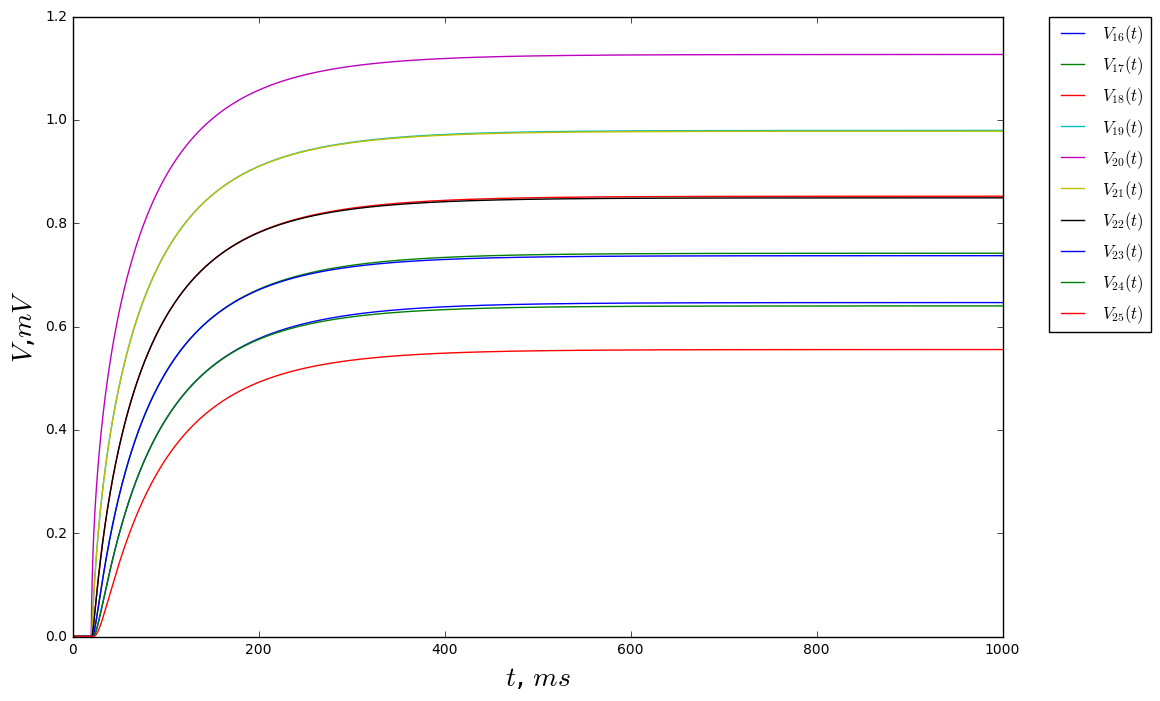

In [4]:
plt.figure(figsize=(12,8))
for k in range(j-5,j+5):
    plt.plot(Exp.t*1000,V[k,:]*1000, label="$V_{"+str(k+1)+"}(t)$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('$t$, $ms$',fontsize=20)
plt.ylabel('$V$,$mV$',fontsize=20)
plt.savefig('exp_1_first_ten_coms.pdf',bbox_inches='tight')


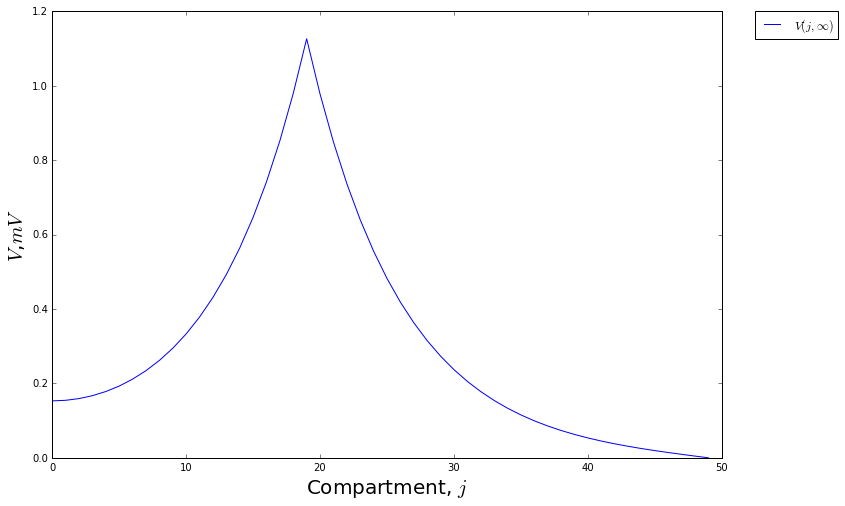

In [42]:
plt.figure(figsize=(12,8))
plt.plot(range(V.shape[0]),V[:,-1]*1000, label="$V(j,\infty)$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Compartment, $j$',fontsize=20)
plt.ylabel('$V$,$mV$',fontsize=20)
plt.savefig('exp_1_inf.pdf',bbox_inches='tight')

We see that there is a maximal voltage in compatrment where current was injected, and exponatial decay in two directions. Also we can see can this decay is to 0 in killed end, and to constant in sealed end ($\frac{dV}{dx}(0,\infty)=0$)

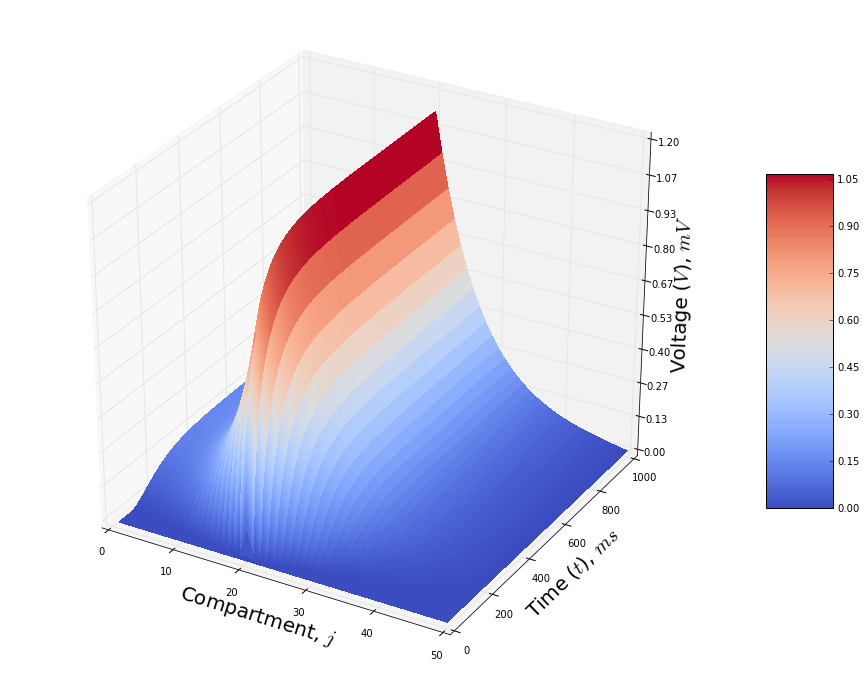

In [47]:
fig = plt.figure(figsize=(16, 12))
ax = fig.gca(projection='3d')
Y=Exp.t[::10]*1000
X, Y = np.meshgrid(range(1,N+1),Y)
V_plot=V[:,::10]*1000
surf = ax.plot_surface(X, Y, V_plot.T, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('Compartment, $j$',fontsize=20)
ax.set_ylabel('Time ($t$), $ms$',fontsize=20)
ax.set_zlabel('Voltage ($V$), $mV$' ,fontsize=20)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.savefig('fig1.pdf', bbox_inches='tight')
plt.show()

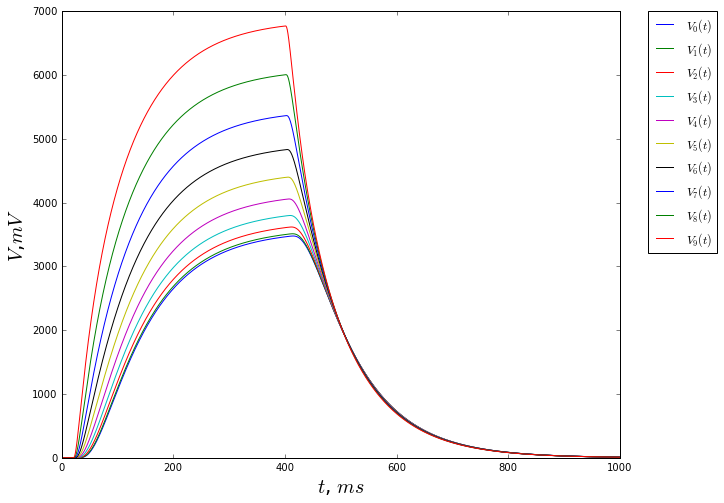

In [43]:
N=50
j=14
Neurite=[passive.Compartment() for k in range(N)]

Neurite[0].type="sealed"
Neurite[-1].type="killed"  #actually, I don't use it in code 

Neurite[j-1].current=lambda t: I_e_step(10**(-10),20*10**(-3),t)-I_e_step(10**(-10),400*10**(-3),t)
# j-1 because in python ind are from 0


Exp2=passive.Experiment()
V_2=Exp2.voltage(Neurite)*1000
plt.figure(figsize=(10,8))
for j in range(V.shape[0]-40):
    plt.plot(Exp2.t*1000,V_2[j,:]*1000, label="$V_{"+str(j)+"}(t)$")
plt.xlabel('$t$, $ms$',fontsize=20)
plt.ylabel('$V$,$mV$',fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig('exp_2_first_ten_coms.pdf',bbox_inches='tight')

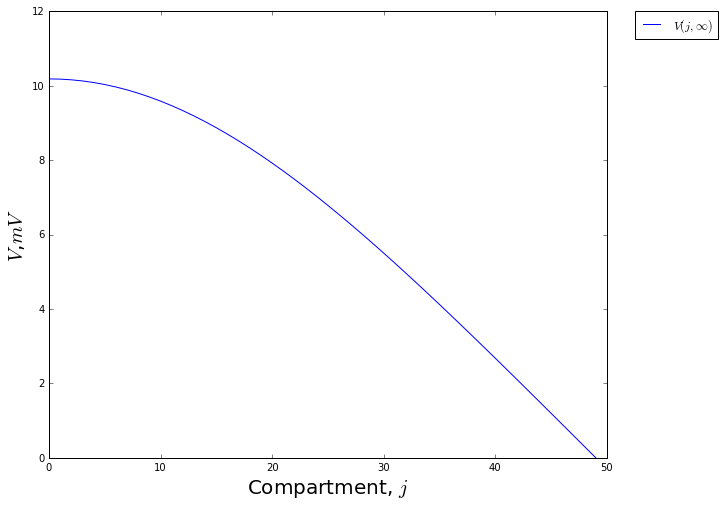

In [45]:
plt.figure(figsize=(10,8))
plt.plot(range(V_2.shape[0]),V_2[:,-1]*1000, label="$V(j,\infty)$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Compartment, $j$',fontsize=20)
plt.ylabel('$V$,$mV$',fontsize=20)
plt.savefig('exp_2_inf.pdf',bbox_inches='tight')

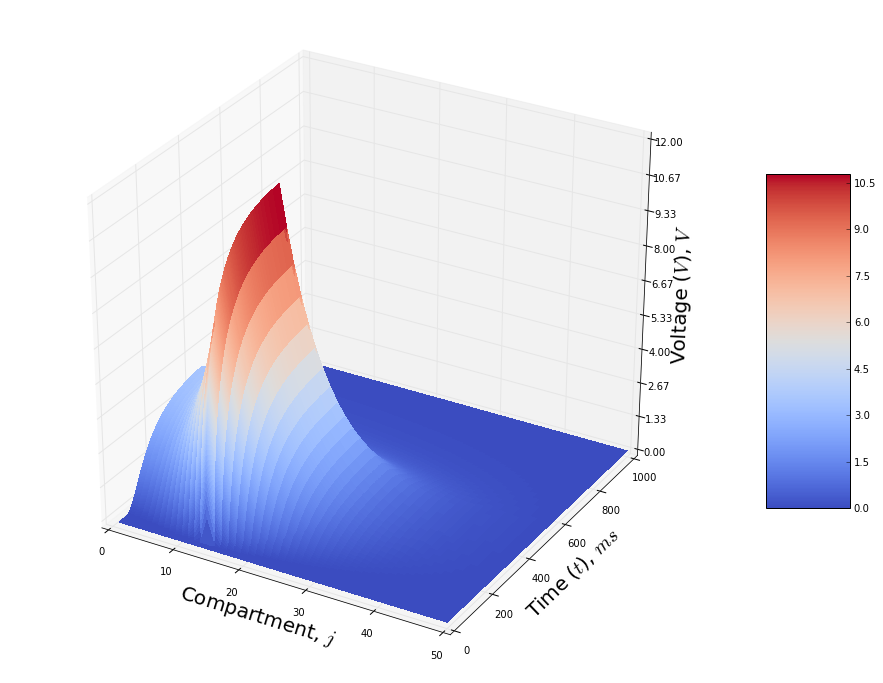

In [50]:
fig = plt.figure(figsize=(16, 12))
ax = fig.gca(projection='3d')
Y=Exp2.t[::10]*1000
X, Y = np.meshgrid(range(1,N+1),Y)
V_plot2=V_2[:,::10]

surf = ax.plot_surface(X, Y, V_plot2.T, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.set_xlabel('Compartment, $j$',fontsize=20)
ax.set_ylabel('Time ($t$), $ms$',fontsize=20)
ax.set_zlabel('Voltage ($V$), $V$' ,fontsize=20)

fig.colorbar(surf, shrink=0.5, aspect=4)
plt.savefig('fig2.pdf', bbox_inches='tight')
plt.show()

### Part 2. Simulation of single compartment Hodgkin-Huxley model of active neurite. 

In [9]:
import active

In [54]:
print alpha_m(0)/(alpha_m(0)+beta_m(0)),alpha_h(0)/(alpha_h(0)+beta_h(0)),alpha_n(0)/(alpha_n(0)+beta_n(0))

0.0529324852572 0.596120753508 0.317676914061


In [8]:
Neurite=[active.Compartment()]
I_0_list=[0,3,6,8]
j=1
for I_0 in I_0_list:   
    Neurite[0].current=lambda t: I_e_step(I_0,50,t)-I_e_step(I_0,1050,t) 
    Exp=active.Experiment(delta_t=2.5*10**(-2),t_start=0.0,t_end=1300)
    (V,m,h,n)=Exp.voltage(Neurite)
    plt.figure(1,figsize=(16, 12))
    plt.subplot(2,2,j)
    plt.plot(Exp.t,V)
    plt.xlabel('Time $(t), ms$', fontsize=20)
    plt.ylabel('Voltage $(V),mV$', fontsize=20)
    j+=1


NameError: name 'active' is not defined

In [ ]:
Neurite=[active.Compartment()]
I_0_list=list(np.arange(0,80,0.5))

threshold=80
start_stim=50
end_stim=1050

rate=[]
for I_0 in I_0_list:   
    Neurite[0].current=lambda t: I_e_step(I_0,start_stim,t)-I_e_step(I_0,end_stim,t) 
    Exp=active.Experiment(delta_t=2.5*10**(-2),t_start=0.0,t_end=1300)
    (V,m,h,n)=Exp.voltage(Neurite)  
    # Number of spikes 
    
    V_bin=[int(el) for el in list(V[Exp.t>start_stim+10]>threshold)] # we start cound after 10 ms of start current stimulation
    V_bin=squeeze(V_bin) #left only unique 0,1 for example squeeze([0,0,0,1,0,1,1,1,0,0,1])=[0,1,0,1,0,1]
    N_spikes=sum(V_bin)
    t_spikes=(end_stim-(start_stim+10))/1000 # /1000 ms in seconds
    rate.append(N_spikes/t_spikes)
    
plt.figure(figsize=(12, 8))
plt.plot(I_0_list,rate) # 1/s or Hz
plt.xlabel('$I, \mu A$', fontsize=20)
plt.ylabel('Firing rate, $Hz$', fontsize=20)